# Part I - Prosper Loan Data - Exploration.
## by Kolawole Joseph. E

## Table of Content

<ul>
<li><a href = "#intro">Introduction</a></li>
<li><a href = "#pre">Preliminary Wrangling</a></li>
<li><a href = "#uni">Univariate Exploration</a></li>
<li><a href = "#bi">Bivariate Exploration</a></li>
<li><a href = "#multi">Multivariate Exploration</a></li>
<li><a href = "#conc">Conclusion</a></li>
</ul>


<a id='intro'></a>
## Introduction
> About the dataset

The Prosper Loan dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

<a id='pre'></a>
## Preliminary Wrangling

In [5]:
# Upgrade Matplotlib for better code functionality
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 5.1 MB/s 
     |████████████████████████████████| 965 kB 41.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [4]:
# Import all necessary libraries and dependecies
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Print the version of the matplotlib 
print(matplotlib.__version__)

3.5.3


In [5]:
# Load dataset into pandas dataframe
df_loan = pd.read_csv('https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv')

In [6]:
# Check the shape of the dataframe
df_loan.shape

(113937, 81)

In [7]:
# Check the dtype of our dataframe
df_loan.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [ ]:
# Programmatialy checking the info of the dataest
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [8]:
# Since the dataset is quite large with about 81 variable, let us isolate some of the focused variables for better visualization
focused_num_var = ['Term', 'BorrowerAPR', 'BorrowerRate',  'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperScore', 'ListingCategory (numeric)', 'CurrentDelinquencies', 'AmountDelinquent', 'TotalTrades', 'LoanOriginalAmount', 'StatedMonthlyIncome', 'MonthlyLoanPayment', 'Recommendations', 'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount', 'Investors']
focused_cat_var = ['ProsperRating (Alpha)', 'LoanStatus', 'BorrowerState', 'EmploymentStatus',]
focused_bool_var = ['IsBorrowerHomeowner', 'CurrentlyInGroup', 'IncomeVerifiable', ]

In [9]:
# Checking for duplicacy in the dataset
df_loan.duplicated().sum()

0

In [10]:
# Checking for null values in the dataset
df_loan.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [11]:
# Checking the statistical properties of the dataset
df_loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the structure of your dataset?

The dataset has  113,937 entries with 81 features. Most variables are numeric in nature, 18 of which are Categorical , 60 are Numereical while 3 are Booleans

### What is/are the main feature(s) of interest in your dataset?

The main feature of interest in the dataset is to derive insights from the dataset. For instance: about the loan repayment defaulters, conditions that affects loan repayment like Employment status, of borrowers, Loan term, Borrower Rate, as well as some other trends in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Apparently, the LoanStatus, CurrentDelinquencies, AmountDelinquent, DelinquenciesLast7Years, LoanCurrentDaysDelinquent, LoanOriginalAmount, as well as other features will help in this investigative work.

<a id='uni'></a>
## Univariate Exploration

**What is the most common Loan Status?**

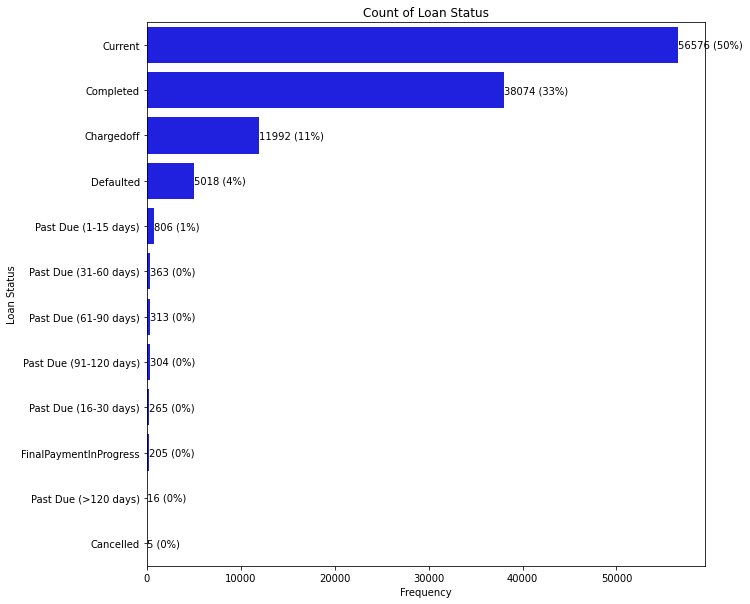

In [ ]:
# visualize the count of the loan staus
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.countplot (y = df_loan['LoanStatus'], color = 'blue', order = df_loan['LoanStatus'].value_counts(ascending=False).index);
        
absolute_value = df_loan['LoanStatus'].value_counts(ascending=False).values
relative_value = df_loan['LoanStatus'].value_counts(ascending=False, normalize=True).values * 100
label = [f'{p[0]} ({p[1]:.0f}%)' 
         for p in zip(absolute_value, relative_value)]
ax.bar_label(container = ax.containers[0], labels=label);

plt.title('Count of Loan Status');
plt.xlabel('Frequency');
plt.ylabel('Loan Status');

Most Loans are 'currently on' (50%), about 33% have been completed, while 11% are charged off meaning that the loan might likely not be paid. 4% have been flagged as defaulted

**Does Employment status affect the issueing of Loan by Prosper?**

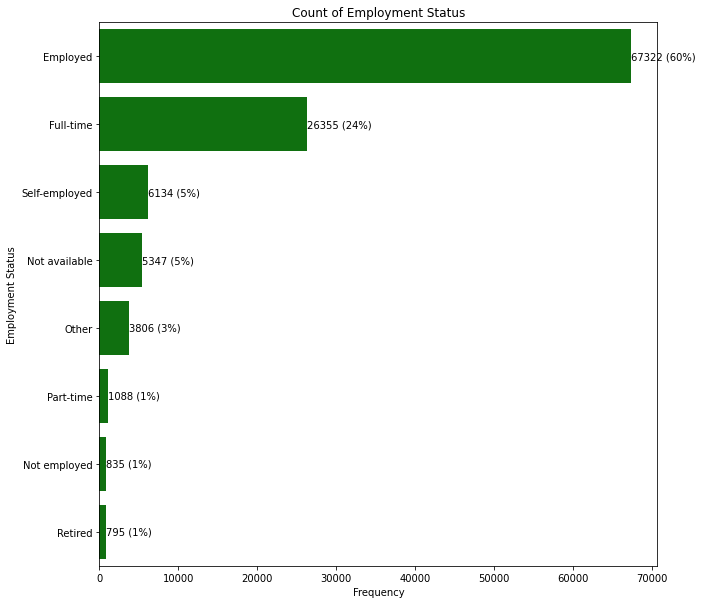

In [ ]:
# visualize the count for each employment status
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.countplot(y = df_loan['EmploymentStatus'], color = 'green', order = df_loan['EmploymentStatus'].value_counts(ascending=False).index)
        
absolute_value = df_loan['EmploymentStatus'].value_counts(ascending=False).values
relative_value = df_loan['EmploymentStatus'].value_counts(ascending=False, normalize=True).values * 100
label = [f'{p[0]} ({p[1]:.0f}%)' 
         for p in zip(absolute_value, relative_value)]

ax.bar_label(container = ax.containers[0], labels=label);

plt.title('Count of Employment Status');
plt.xlabel('Frequency');
plt.ylabel('Employment Status');

Obviously, it can be deduced that Prosper Loan is associated with employment status as most peolple on the loan list are employed (60%), 24% are employed full time. The percent of the unemploed and retired is infinitesimally minute and negligible (1%)

**What are the risks attached to each loans originating from July 2009?**

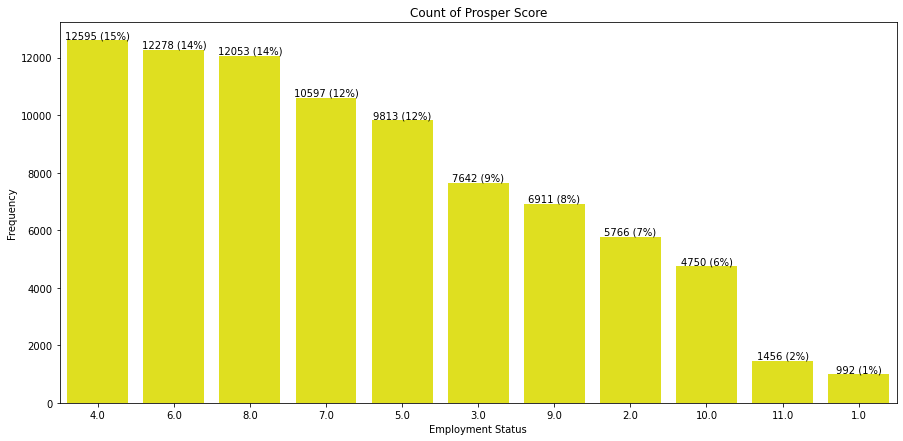

In [ ]:
# visualize the count of Prosper Score
fig, ax = plt.subplots(figsize=(15, 7))
ax = sns.countplot(x = df_loan['ProsperScore'], color = 'yellow', order = df_loan['ProsperScore'].value_counts(ascending = False).index);
#      
num = df_loan['ProsperScore'].value_counts(ascending=False).values
percent= df_loan['ProsperScore'].value_counts(ascending=False, normalize=True).values * 100
label = [f'{p[0]} ({p[1]:.0f}%)' 
         for p in zip(num, percent)]

ax.bar_label(container = ax.containers[0], labels = label);
plt.title('Count of Prosper Score');
plt.ylabel('Frequency');
plt.xlabel('Employment Status');

The Prosper Score ranges from 1-10, with 10 being the best, or lowest risk score and 1 being the highest risk. Most loan has score ranging from 3.0 to 9.0. Score 4.0, 6.0 and 8.0 are among the highest frequencies. Though the Prosper Score is only applicable to loans originated after July 2009, score 4.0 have the highest count  with 15% frequency.

**What is the distribution of BorrowerAPR?**

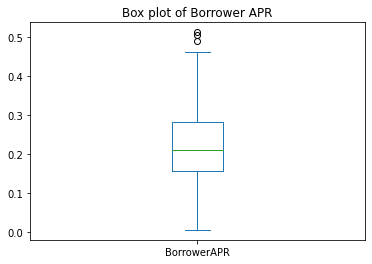

In [ ]:
# Visualize the favorite_count using boxplot to inspect it's values in terms of outliers since it's of interest
df_loan['BorrowerAPR'].plot(kind = 'box', title='Box plot of Borrower APR');

From the figure above, we can see that BorrowerAPR have some number of outlier values 0.48 to as high as 0.52 with the mean at 0.22. The lowest value lies around 0.0 while its highest value lies somewhere around 0.47 and 25% quartile lies at 0.15.

**What is the distribution of the Loan Original Amount?**

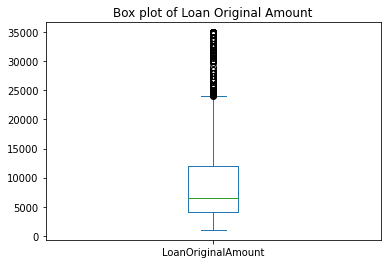

In [ ]:
# Visualize the favorite_count using boxplot to inspect it's values in terms of outliers since it's of interest
df_loan['LoanOriginalAmount'].plot(kind = 'box', title='Box plot of Loan Original Amount');

Obviously, we can see that Loan Original Amount have a great number of outlier values in them ranging from somewhere around 24,000 to as high as 36,000. Though the mean lies around 6,500. The lowest value lies around 1,000 while its highest value lies somewhere around 24,000 and 25% quartile lies at 4,000. With its 75% quartile lying around 13,500

<a id='intro'></a>

## Bivariate Exploration

**What amount of loan does Prosper Loan give with respect to each employment status?**

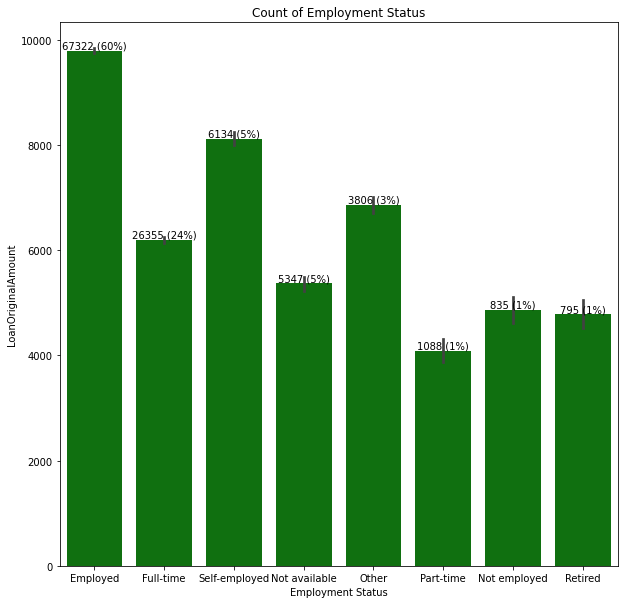

In [ ]:
# visualize the LoanOriginalAmount per each employment status
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.barplot(x = df_loan['EmploymentStatus'], y = df_loan['LoanOriginalAmount'], color = 'green', order = df_loan['EmploymentStatus'].value_counts(ascending = False).index)
        
absolute_value = df_loan['EmploymentStatus'].value_counts(ascending=False).values
relative_value = df_loan['EmploymentStatus'].value_counts(ascending=False, normalize=True).values * 100
label = [f'{p[0]} ({p[1]:.0f}%)' 
         for p in zip(absolute_value, relative_value)]

ax.bar_label(container = ax.containers[0], labels=label);

plt.title('Count of Employment Status');
plt.xlabel('Employment Status');
plt.ylabel('LoanOriginalAmount');

As seen in the chart above, 60% of the loan were given to Employed individuals while 24% were given to Full time employees

**Are more loan given to Borrow whose income are verifiable?**

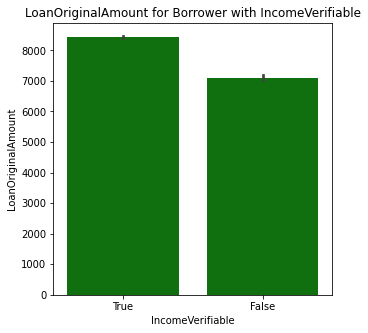

In [ ]:
# visualize the LoanOriginalAmount for each IncomeVerifiable Borrower
fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.barplot(x = df_loan['IncomeVerifiable'], y = df_loan['LoanOriginalAmount'], color = 'green', order = df_loan['IncomeVerifiable'].value_counts(ascending = False).index)
        
plt.title('LoanOriginalAmount for Borrower with IncomeVerifiable');
plt.xlabel('IncomeVerifiable');
plt.ylabel('LoanOriginalAmount');

Obviously, Prosper loan give more loan amount to Borrower with verifiable income. About 92% of the loan is given to this borrowers.

**Does Borrower with verifiable income also default in loan repayment?**

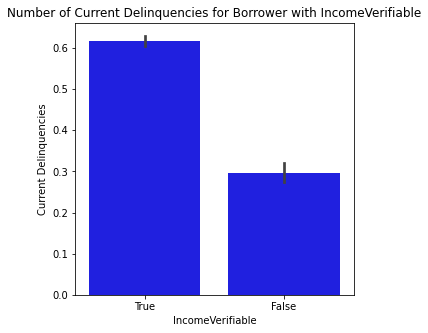

In [ ]:
# visualize the CurrentDelinquencies for IncomeVerifiable
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(x = df_loan['IncomeVerifiable'], y = df_loan['CurrentDelinquencies'], color = 'b', order = df_loan['IncomeVerifiable'].value_counts(ascending = False).index).set(title = 'Current Delinquencies Per Borrower State');

plt.title('Number of Current Delinquencies for Borrower with IncomeVerifiable');
plt.xlabel('IncomeVerifiable');
plt.ylabel('Current Delinquencies');

Higher percent of CurrentDelinquencies are from borrowers with IncomeVerifiable

**What effect does the Prosper score  has on the Borrower Rate?**

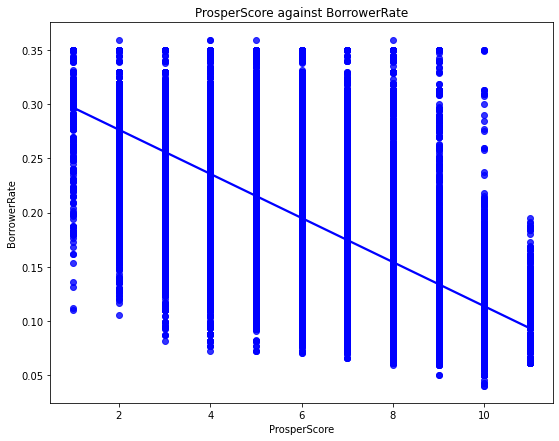

In [ ]:
# plot a regplot to check the realationship between ProsperScore and BorrowerRate
fig, ax = plt.subplots(figsize=(9, 7))
sns.regplot(x = 'ProsperScore', y = 'BorrowerRate', data = df_loan, color = 'blue').set(title = 'ProsperScore against BorrowerRate');

Since the Prosper Score ranges from 1-10, with 10 being the best, or lowest risk score and 1 being the highest risk. The prosper score has a negative effect on the borrower rate

**Does the loan original amount determines the loan monthly payment?**

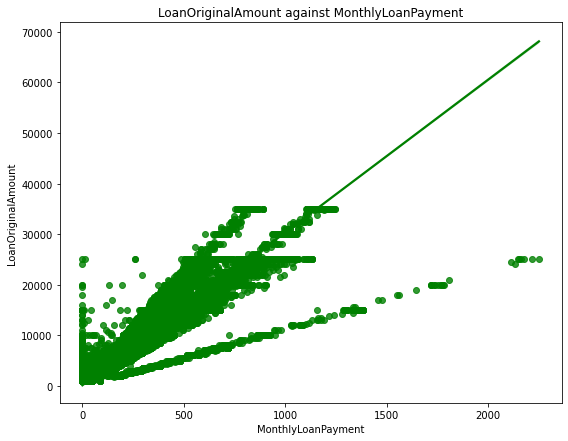

In [ ]:
# plot a regplot to check the relationship between MonthlyLoanPayment and LoanOriginalAmount
fig, ax = plt.subplots(figsize=(9, 7))
sns.regplot(x = 'MonthlyLoanPayment', y = 'LoanOriginalAmount',  data = df_loan, color = 'green').set(title = 'LoanOriginalAmount against MonthlyLoanPayment');

Ofcourse, the Loan original amount determines it's monthly payment amount. As the Original loan amount increases, the monthly payment amount increases

**Does the Borrower Rate determines the Lender Yield?**

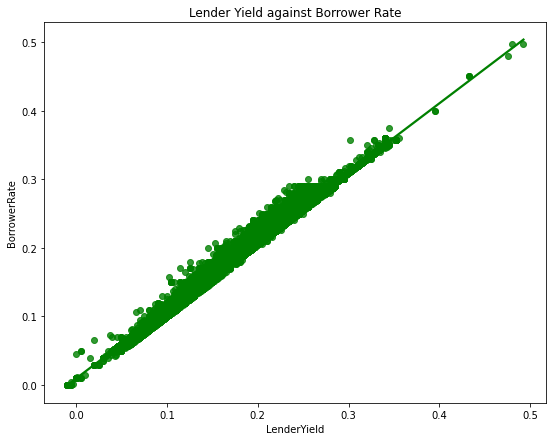

In [ ]:
# Plot a regplot to check the relationship between LenderYield and BorrowerRate
fig, ax = plt.subplots(figsize=(9, 7))
sns.regplot(x = 'LenderYield', y = 'BorrowerRate',  data = df_loan, color = 'green').set(title = 'Lender Yield against Borrower Rate');

Borrower Rate has a stong positive correlation with LenderYield. Meaning the BorrowerRate determines the LenderYield. As bthe BorrowerRate increases, the Lender Yield increases.

**Does the number of Investment from friends determines its number of recommendations?**

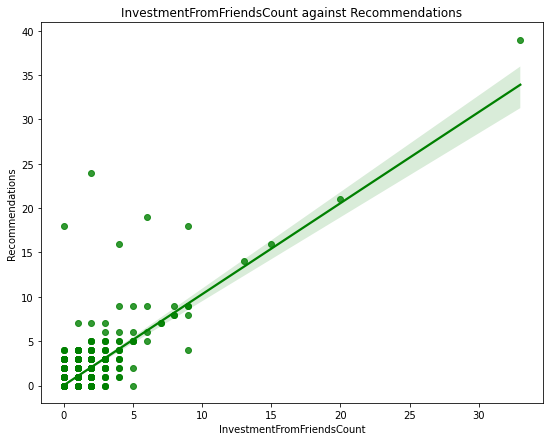

In [ ]:
# Plot a regplot to check the relationship between InvestmentFromFriendsCount and Recommendations
fig, ax = plt.subplots(figsize=(9, 7))
sns.regplot(x = 'InvestmentFromFriendsCount', y = 'Recommendations',  data = df_loan, color = 'green').set(title = 'InvestmentFromFriendsCount against Recommendations');

Obviously, the number of investment from friends is a driving force behind the number of recommendations for loans. Both InvestmentFromFriendsCount and Recommendations are positively correlated, hence as more friends invest, the Recommendation count increases. Though this seem to be densely populated only at the origin between the count of 0 to 10 for. This leaves a question in mind if this is a maipulation from the borrower to quickly get loan from Prosper or a somewhat means to get recomendations and investments

**How many deliquencies are currently recorded per Borrower State and what state has more deliquencies?**

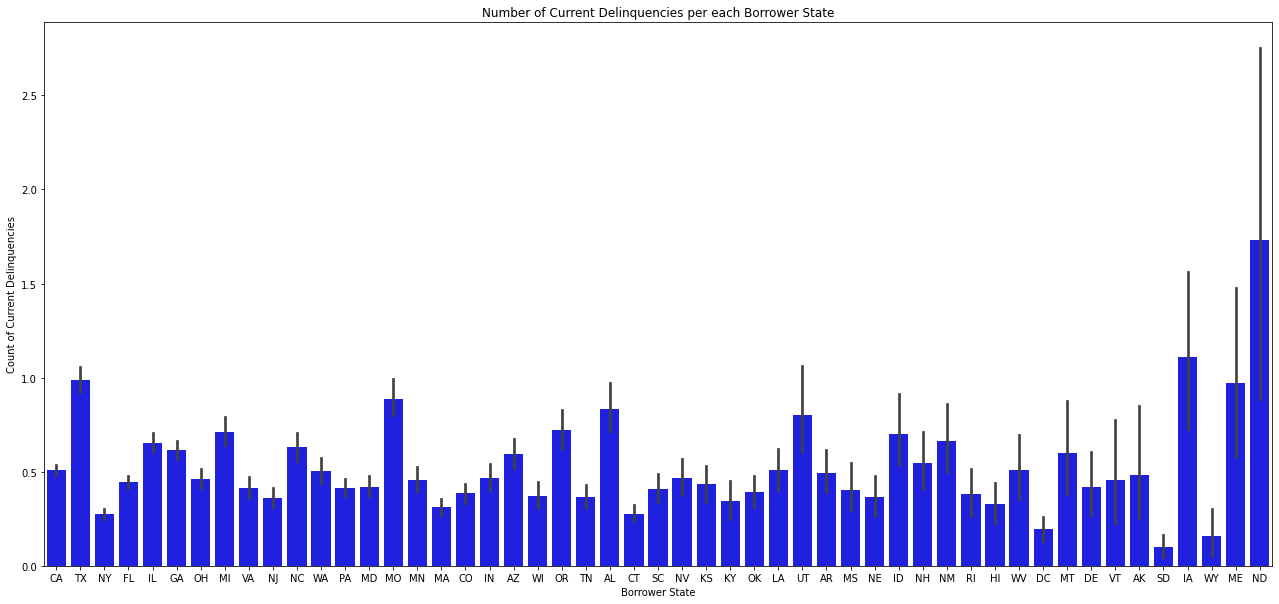

In [ ]:
# visualize the CurrentDelinquencies for each BorrowerState
fig, ax = plt.subplots(figsize=(22, 10))
sns.barplot(x = df_loan['BorrowerState'], y = df_loan['CurrentDelinquencies'], color = 'b', order = df_loan['BorrowerState'].value_counts(ascending = False).index).set(title = 'Current Delinquencies Per Borrower State');

plt.title('Number of Current Delinquencies per each Borrower State');
plt.xlabel('Borrower State');
plt.ylabel('Count of Current Delinquencies');

'ND' state has the highest number of deliquencies as high as 2.75. This is followed by 'IA' state which is as high as 1.5 and 'TX' state about 1.1 averagely

**What is the distribution of the LoanOriginalAmount per each BorrowerState?**

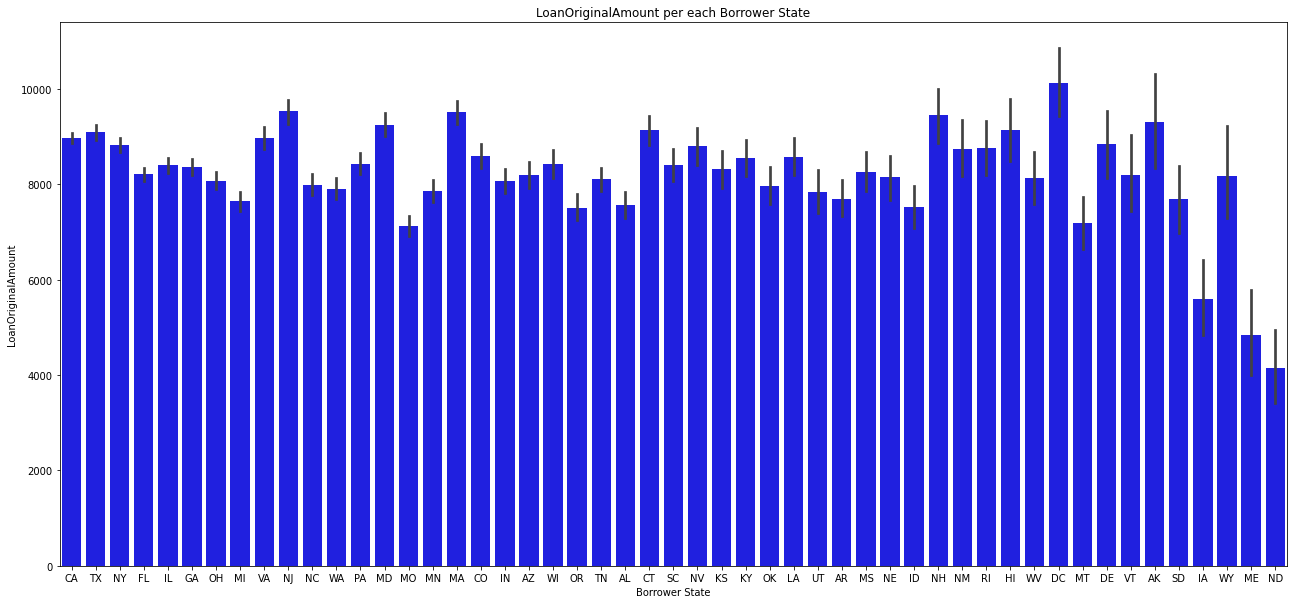

In [ ]:
# visualize the LoanOriginalAmount for each BorrowerState
fig, ax = plt.subplots(figsize=(22, 10))
sns.barplot(x = df_loan['BorrowerState'], y = df_loan['LoanOriginalAmount'], color = 'b', order = df_loan['BorrowerState'].value_counts(ascending = False).index).set(title = 'LoanOriginalAmount Per Borrower State');

plt.title('LoanOriginalAmount per each Borrower State');
plt.xlabel('Borrower State');
plt.ylabel('LoanOriginalAmount');

'DC' state has the highest LoanOriginalAmount as high as 10,000 up to 11,000. This is followed by 'NJ' state which is as high as 9,500 and 'MA' state about 9,400. It is interesting to note here that ND state which has the highest numbers of Current deliquences has the lowest loan amount of about 4,000.

**What is the average BorrowerAPR for each ProsperRating (Alpha)?**

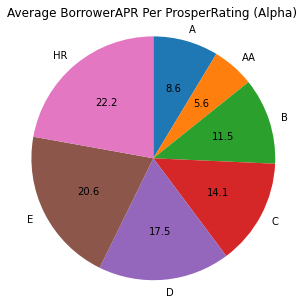

In [ ]:
# Pie chart for ProsperRating (Alpha) vs BorrowerAPR mean
fig, ax = plt.subplots(figsize=(5, 5))
plt.pie(x = df_loan.groupby('ProsperRating (Alpha)').BorrowerAPR.mean(), 
        labels = df_loan.groupby('ProsperRating (Alpha)').BorrowerAPR.mean().index, colors = None,
        startangle = 90,
        counterclock = False, autopct='%0.1f')
plt.axis('square') 
plt.title('Average BorrowerAPR Per ProsperRating (Alpha)');

As seen above, the highest rating of AA has lowest average BorrowerAPR of 5.6, whereas HR which happens to be the lowerest rating has the highest average BorrowerAPR of 22.2. This helps to establish the fact that higher ProsperRating is associated with lower BorrowerAPR and vice versa.

**What is the average LoanOriginalAmount for each Term?**

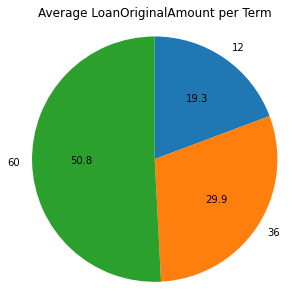

In [ ]:
# Pie chart for Term vs LoanOriginalAmount mean
fig, ax = plt.subplots(figsize=(5, 5))
plt.pie(x = df_loan.groupby('Term').LoanOriginalAmount.mean(), 
        labels = df_loan.groupby('Term').LoanOriginalAmount.mean().index, colors = None,
        startangle = 90,
        counterclock = False, autopct='%0.1f')
plt.axis('square') 
plt.title('Average LoanOriginalAmount per Term');

Here, a pattern can be seen that 12 which is the shortest loan term has the lowest average loan amount. This is followed by 36 and finally 60 (the longest loan term) with the highest average loan amount. Hence we can conclude that the longer the term, the higher the loan amount and vice versa.

**Does term contribute to default in loan repayment?**

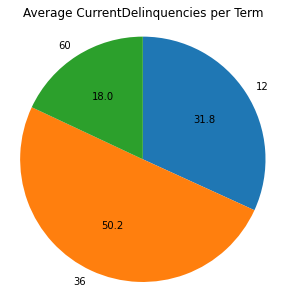

In [ ]:
# Pie chart for Term vs CurrentDelinquencies mean
fig, ax = plt.subplots(figsize=(5, 5))
plt.pie(x = df_loan.groupby('Term').CurrentDelinquencies.mean(), 
        labels = df_loan.groupby('Term').CurrentDelinquencies.mean().index, colors = None,
        startangle = 90,
        counterclock = False, autopct='%0.1f')
plt.axis('square') 
plt.title('Average CurrentDelinquencies per Term');

The term also plays little but significant role when it comes to delinquencies because term 36 which is median when it comes to the order of terms has about 50.2% delinquencies whereas term 60, which has more loan amount has only 18%. Also, term 12 has 31.8% delinquencies. This inconsistent pattern might be a result of the little amount of loan allocated for a short term and vice versa, people with more loan amount have enough time to pay back thereby escaping being flagged as a default of delinquency. Meanwhile term 36 is allocated a reasonable amount of loan but with lesser payback window. Hence, Prosper Loan should be given for a longer term.

<a id='multi'></a>

## Multivariate Exploration

**What are some of the Numeric features that are correlated?**

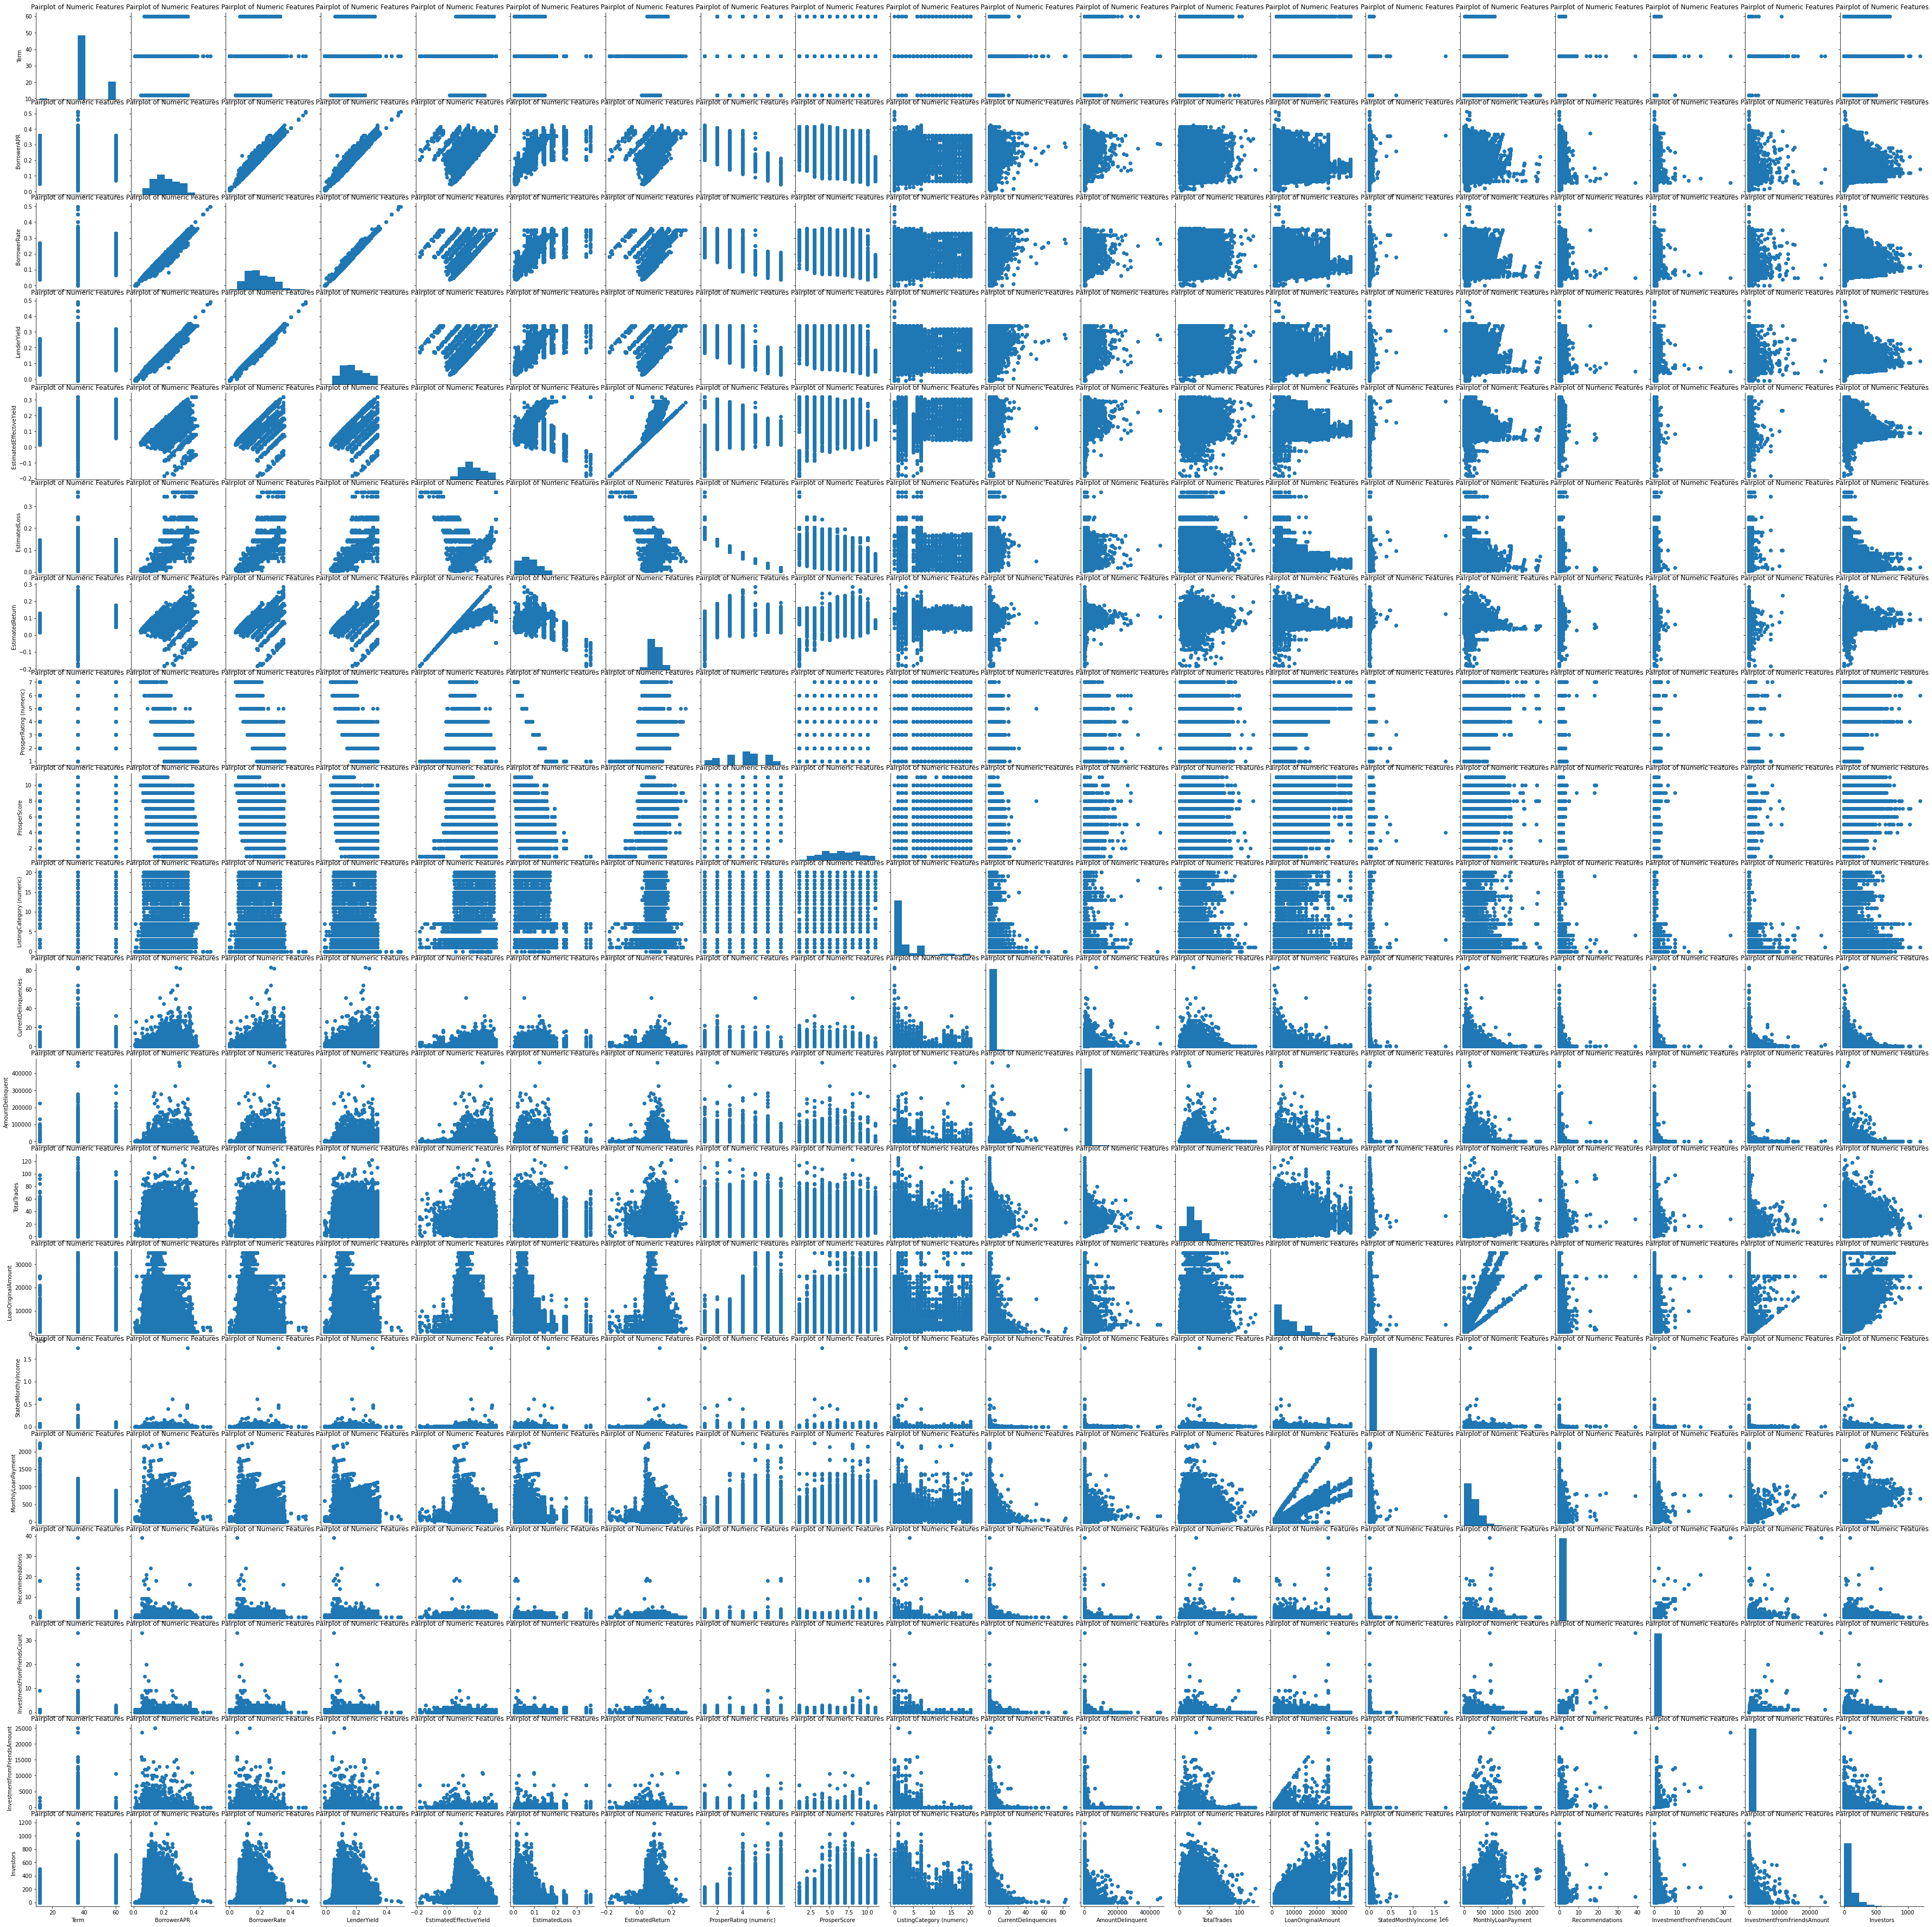

In [ ]:
# Plot a pairplot to have a quick glance through the numeric focused features
sns.PairGrid(data = df_loan[focused_num_var]).map_diag(plt.hist, bins = 10).map_offdiag(plt.scatter).set(title = 'Pairplot of Numeric Features');

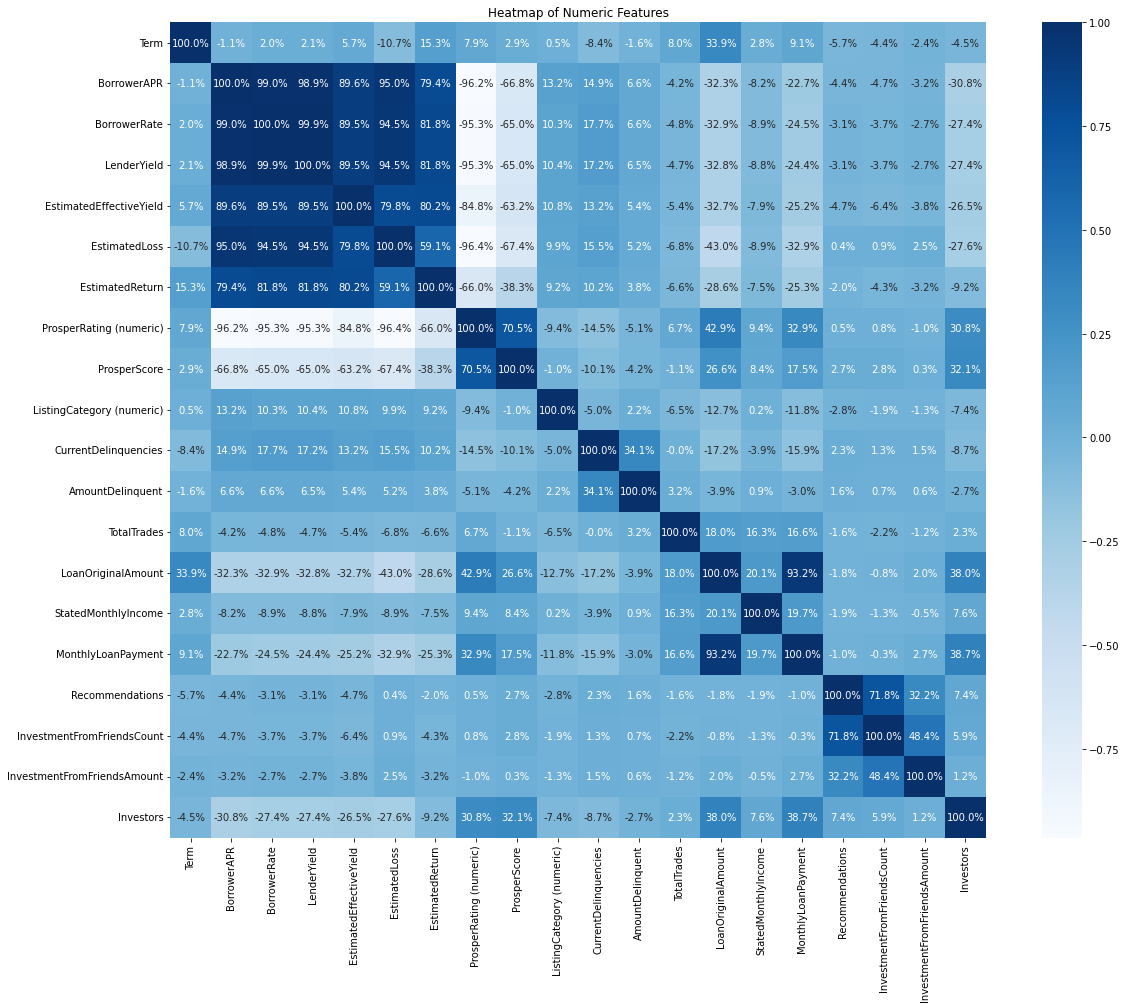

In [ ]:
# Plotting the heatmap of correlation between the focused_num_var features BorrowerRate
plt.figure(figsize=(20, 15))
sns.heatmap(df_loan[focused_num_var].corr(), cbar = True, square = True, fmt = '0.1%', annot = True, cmap = 'Blues').set(title = 'Heatmap of Numeric Features');

Quite a number of features are correlated either strongly positive or negative. Example of such includes:

1. BorrowerAPR and BorrowerRate (99.0%)
2. BorrowerAPR and LenderYield (98.9%)
3. Recommendations and InvestmentFromFriendsCount (71.8%)
4. LenderYield and EstimatedLoss (95.4%) etc
5. BorrowerAPR and ProsperRating (numeric) (-96.2%)
6. BorrowerRate and ProsperRating (numeric) (-95.3%)
7. EstimatedLoss and ProsperRating (numeric) (-96.4%)
8. EstimatedEffectiveYield and ProsperRating (numeric) (-84.8%) etc

**What is the Borrower APR based on the ProsperRating (Alpha) per each listing year?**

In [ ]:
# First convert the ListingCreationDate data type from object type to datetime
df_loan.ListingCreationDate = pd.to_datetime(df_loan.ListingCreationDate)

In [ ]:
# Extract each year from the ListingCreationDate column of the dataset and store it as listing_year
df_loan['listing_year'] = df_loan.ListingCreationDate.dt.year.astype(int)

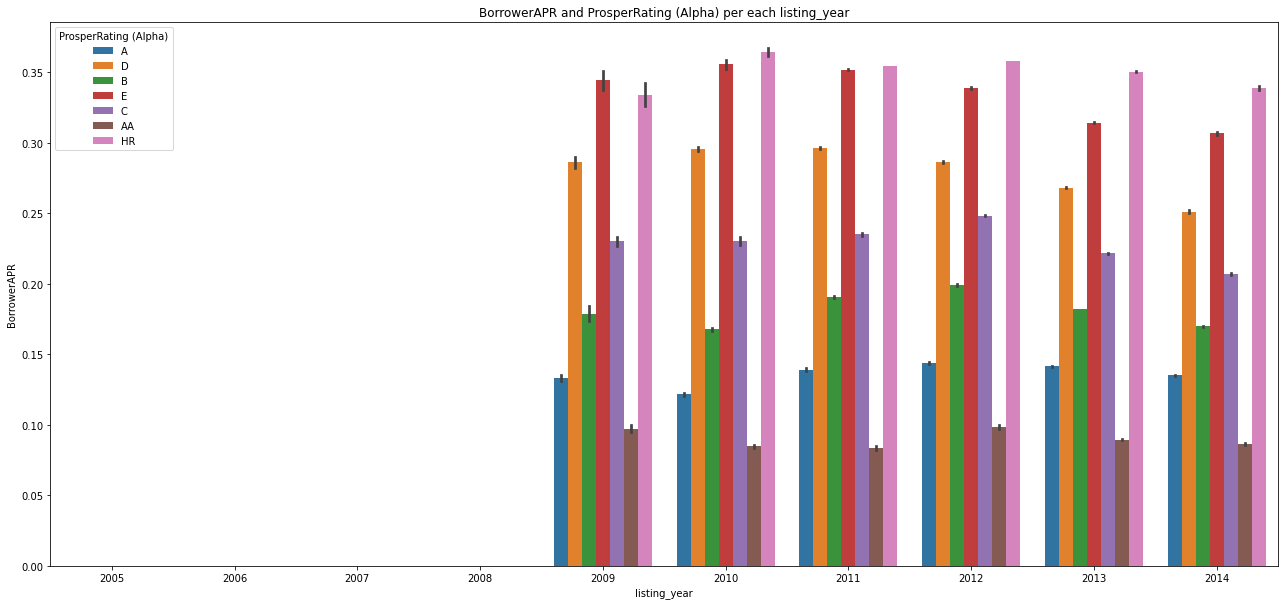

In [ ]:
# Visualize the Borrower APR for each ProsperRating (Alpha) per each listing year
plt.figure(figsize = (22, 10))
sns.barplot(x = df_loan['listing_year'], y = df_loan['BorrowerAPR'], hue = df_loan['ProsperRating (Alpha)'])
plt.title('BorrowerAPR and ProsperRating (Alpha) per each listing_year')
plt.xlabel('listing_year')
plt.ylabel('BorrowerAPR');

Aside from year 2009, ProsperRating (Alpha) 'HR' has a higher APR in all years. This is followed by ProsperRating (Alpha)'E' which outperformed HR in year 2009.

**What are the CurrentDelinquencies with respect to the EmploymentStatus for each listing year?**

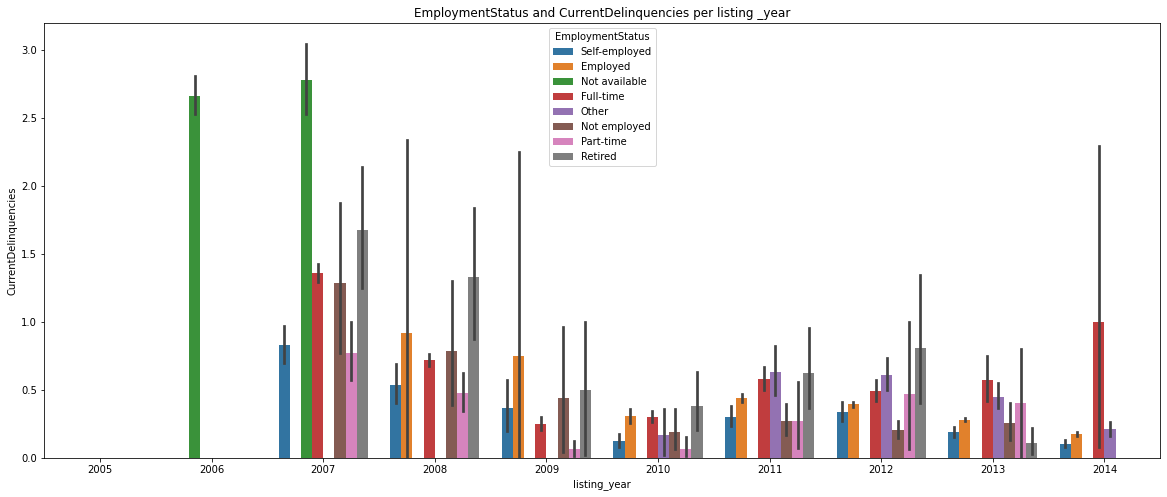

In [ ]:
# visualize the CurrentDelinquencies per year with a hue of EmploymentStatus for each listing year
plt.figure(figsize = (20, 8))
sns.barplot(x = df_loan['listing_year'], y = df_loan['CurrentDelinquencies'], hue = df_loan['EmploymentStatus'])
plt.title('EmploymentStatus and CurrentDelinquencies per listing _year')
plt.xlabel('listing_year')
plt.ylabel('CurrentDelinquencies');

In year 2006 and 2007, most delinquencies are from Borrower whose employment status were not available probably because it was not given. However, from year 2010 to 2012, most delinquencies are from retired borrowers. While more delinquencies are recorded for borrowers whose employment status is a full time one.

<a id='conc'></a>
## Conclusion

The Prosper Loan dataset has  113,937 entries with 81 features. Most variables are numeric in nature, 18 of which are Categorical , 60 are Numerical while 3 are Booleans.

The main feature of interest in the dataset is to derive insights from the dataset. For instance: about the loan repayment defaulters, conditions that affects loan repayment like Employment status, of borrowers, Loan term, Borrower Rate, as well as some other trends in the dataset. And apparently, the LoanStatus, CurrentDelinquencies, AmountDelinquent, DelinquenciesLast7Years, LoanCurrentDaysDelinquent, LoanOriginalAmount, as well as other features will help in this investigative work. 

After going through the whole process some of the insights derived are as follows:

* Most Loans are 'currently on' (50%), about 33% have been completed, while 11% are charged off meaning that the loan might likely not be paid. 4% have been flagged as defaulted.

* Prosper Loan is associated with employment status as most peolple on the loan list are employed (60%), 24% are employed full time. The percent of the unemploed and retired is infinitesimally minute and negligible (1%).

* The Prosper Score ranges from 1-10, with 10 being the best, or lowest risk score and 1 being the highest risk. Most loan has score ranging from 3.0 to 9.0. Score 4.0, 6.0 and 8.0 are among the highest frequencies. Though the Prosper Score is only applicable to loans originated after July 2009, score 4.0 have the highest count  with 15% frequency.

* BorrowerAPR have some number of outlier values 0.48 to as high as 0.52 with the mean at 0.22. The lowest value lies around 0.0 while its highest value lies somewhere around 0.47 and 25% quartile lies at 0.15.

* Loan Original Amount have a great number of outlier values in them ranging from somewhere around 24,000 to as high as 36,000. Though the mean lies around 6,500. The lowest value lies around 1,000 while its highest value lies somewhere around 24,000 and 25% quartile lies at 4,000. With its 75% quartile lying around 13,500.

* 60% of the loan were given to Employed individuals while 24% were given to Full time employees.

* Prosper loan give more loan amount to Borrower with verifiable income. About 92% of the loan is given to this borrowers.

* Higher percent of CurrentDelinquencies are from borrowers with IncomeVerifiable.

* Since the Prosper Score ranges from 1-10, with 10 being the best, or lowest risk score and 1 being the highest risk. The prosper score has a negative effect on the borrower rate.

* The Loan original amount determines it's monthly payment amount. As the Original loan amount increases, the monthly payment amount increases.

* Borrower Rate has a stong positive correlation with LenderYield. Meaning the BorrowerRate determines the LenderYield. As bthe BorrowerRate increases, the Lender Yield increases.

* The number of investment from friends is a driving force behind the number of recommendations for loans. Both InvestmentFromFriendsCount and Recommendations are positively correlated, hence as more friends invest, the Recommendation count increases. Though this seem to be densely populated only at the origin between the count of 0 to 10 for. This leaves a question at hand if this is a maipulation from the borrower to quickly get loan from Prosper or a somewhat means to get recomendations and investments.

* 'ND' state has the highest number of deliquencies as high as 2.75. This is followed by 'IA' state which is as high as 1.5 and 'TX' state about 1.1 averagely.

* 'DC' state has the highest LoanOriginalAmount as high as 10,000 up to 11,000. This is followed by 'NJ' state which is as high as 9,500 and 'MA' state about 9,400. It is interesting to note here that ND state which has the highest numbers of Current deliquences has the lowest loan amount of about 4,000.

* The highest rating of AA has lowest average BorrowerAPR of 5.6, whereas HR which happens to be the lowerest rating has the highest average BorrowerAPR of 22.2. This helps to establish the fact that higher ProsperRating is associated with lower BorrowerAPR and vice versa.

* Here, a pattern can be seen that 12 which is the shortest loan term has the lowest average loan amount. This is followed by 36 and finally 60 (the longest loan term) with the highest average loan amount. Hence we can conclude that the longer the term, the higher the loan amount and vice versa.

* The term also plays little but significant role when it comes to delinquencies because term 36 which is median when it comes to the order of terms has about 50.2% delinquencies whereas term 60, which has more loan amount has only 18%. Also, term 12 has 31.8% delinquencies. This inconsistent pattern might be a result of the little amount of loan allocated for a short term and vice versa, people with more loan amount have enough time to pay back thereby escaping being flagged as a default of delinquency. Meanwhile term 36 is allocated a reasonable amount of loan but with lesser payback window. Hence, Prosper Loan should be given for a longer term.

* Quite a number of features are correlated either strongly positive or negative. Example of such includes:

1. BorrowerAPR and BorrowerRate (99.0%)
2. BorrowerAPR and LenderYield (98.9%)
3. Recommendations and InvestmentFromFriendsCount (71.8%)
4. LenderYield and EstimatedLoss (95.4%) etc
5. BorrowerAPR and ProsperRating (numeric) (-96.2%)
6. BorrowerRate and ProsperRating (numeric) (-95.3%)
7. EstimatedLoss and ProsperRating (numeric) (-96.4%)
8. EstimatedEffectiveYield and ProsperRating (numeric) (-84.8%) etc.

* Aside from year 2009, ProsperRating (Alpha) 'HR' has a higher APR in all years. This is followed by ProsperRating (Alpha)'E' which outperformed HR in year 2009.

* In year 2006 and 2007, most delinquencies are from Borrower whose employment status were not available probably because it was not given. However, from year 2010 to 2012, most delinquencies are from retired borrowers. While more delinquencies are recorded for borrowers whose employment status is a full time one.